In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Теория
=====

В задаче я буду использовать следующие обозначения:

$$q_{\text{параметры априорного распределения}}(\text{оцениваемый параметр})\text{ — априорная плотность,}$$
$$q_{\text{параметры априорного распределения}}(\text{оцениваемый параметр }|\text{ выборка})\text{ — апострериорная плотность,}$$
$$X(k,l)\text{ — выборка из распределения Бернулли, в которой $k$ успехов и $l$ провалов,}$$
$$f_{\text{параметр}}(\text{выборка})\text{ — функция правдоподобия,}$$
$$B(\alpha,\beta)\text{ — бета-функция,}$$
$$Be(\alpha,\beta)\text{ — бета-распределение.}$$

Бета-распределение является сопряжённым к распределению Бернулли. Проверим это и посмотрим, как выглядит байесовская оценка параметра $\theta = \text{«количество успехов»}$. Положим априорную плотность равной плотности бета-распределения.

$$q_{\alpha,\beta}(\theta) = \frac{{\theta}^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} \sim Be(\alpha, \beta)$$

Тогда апостериорная плотность имеет тот же вид, что и априорная.

$$q_{\alpha,\beta}(\theta | X(k,l))
=\frac{f_\theta(X(k,l))q_{\alpha,\beta}(\theta)}{\int_0^1f_t(X(k,l))q_{\alpha,\beta}(t)dt}
=\frac{\theta^k(1 - \theta)^l\frac{{\theta}^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}}{\int_0^1t^k(1 - t)^l\frac{{t}^{\alpha - 1} (1 - t)^{\beta - 1}}{B(\alpha, \beta)}dt}=$$
$$=\frac{\theta^{k + \alpha - 1}(1 - \theta)^{l + \beta - 1}}
{\int_0^1t^{k + \alpha - 1}(1 - t)^{l + \beta - 1}dt}
=\frac{\theta^{k + \alpha - 1}(1 - \theta)^{l + \beta - 1}}{B(k + \alpha,l + \beta)} \sim Be(k + \alpha, l + \beta)$$

Мы видим, как персчитываются параметры, и выводим байесовскую оценку. Точечная байесовская оценка — это математическое ожидание, взятое по апостериорному распределению. Известно, что

$$\xi\sim Be(\alpha,\beta) \Rightarrow E\xi=\frac{\alpha}{\alpha + \beta}\text{.}$$

Тогда значение байесовской оценки $\hat{\theta}_{\alpha,\beta}(X(k,l))$ параметра $\theta$, когда

+ априорное распределение — это $Be(\alpha,\beta)$
+ в выборке $k$ успехов и $l$ неудач.

$$\hat{\theta}_{\alpha,\beta}(X(k,l))=\frac{\alpha + k}{\alpha + \beta + k + l}$$

Оценка максимального правдоподобия для бернуллиевской случайной величины — это выборочное среднее. Запишем её в наших обозначениях.

$$\hat{\theta}_\text{ММП}(X(k,l)) = \frac{k}{k + l}$$

Виден смысл параметров $\alpha$ и $\beta$ априорного распределения. Эксперт предполагает, что если бросить монету $\alpha + \beta$ раз, то выпадет $\alpha$ успехов. Чем больше $\alpha + \beta$, тем больше максимальный размер выборки, на которой заметно мнение эксперта.

**Замечание 1.** Оценка методом максимального правдоподобия — это оценка, где экперт сказал «если бросить монету $0$ раз, то выпадет $0$ успехов и $0$ неудач».

Графики плотностей априорного распределения
====

Возьмём следующие априорные распределения:

+ $Be(5, 5)$ монета скорее честна, мнение эксперта берётся с небольшим весом
+ $Be(250, 250)$ монета скорее честна, мнение эксперта берётся с большим весом
+ $Be(8, 2)$ монета скорее счастливая, мнение эксперта берётся с небольшим весом
+ $Be(400, 100)$ монета скорее счастливая, мнение эксперта берётся с большим весом

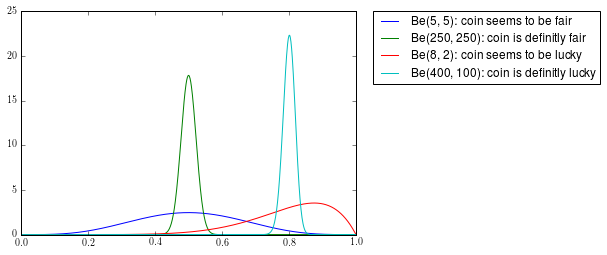

In [26]:
class Apriori:
    def __init__(self, a, b, label="apriori"):
        self.a = a
        self.b = b
        self.label = "Be(" + str(self.a) + ", " + str(self.b) + "): " + label
    def __repr__(self):
        return "apr{" + self.label + "}";

apriori = [Apriori(5, 5, "coin seems to be fair"), 
           Apriori(250, 250, "coin is definitly fair"),
           Apriori(8, 2, "coin seems to be lucky"),
           Apriori(400, 100, "coin is definitly lucky")]

x = np.linspace(0, 1, 1000)
plt.rc('text', usetex=True)
for params in apriori:
    plt.plot(x, sps.beta.pdf(x, params.a, params.b), label=params.label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Почему нет априорного знания «монета нечестная»?
----

В условии, как пример, предлагался вариант знания «монета нечестная» (наименее вероятны значения около $0.5$).

Априорному знанию «монета скорее нечестная» соответствует график плотности в форме чашки. В бета-распределении такое достигается только когда и $\alpha$, и $\beta$ меньше $1$. Работать с $\alpha$ и $\beta$ меньшими единицы не хочется. Исходя из формулы для апостериорной плотности, предположение эксперта, выраженное такими $\alpha$ и $\beta$, затрётся даже небольшой выборкой.

Генерируем выборки
====

Рассмотрим следующие выборки:

+ 20 бросков счастливой монеты $lucky$ ($p = 0.8$)
+ 20 бросков честной монеты $fair$ ($p = 0.5$)
+ 20 бросков несчастливой монеты $unlucky$ ($p = 0.2$)

In [3]:
lucky = sps.bernoulli.rvs(0.8, size=20)
fair = sps.bernoulli.rvs(0.5, size=20)
unlucky = sps.bernoulli.rvs(0.2, size=20)

Точечные байесовские оценки
============

Найдём байесовские оценки при различных параметрах априорного распределения. Сравним их с оценкой методом максимального правдоподобия. Для наглядности проведём сравнение на графике: кроме значений байесовской оценки и оценки ММП, отметим на нём априорную и апостериорную плотность, а также априорное значение оценки. Числовые значения байесовских оценок будут отражены в легенде к графику.

In [24]:
def draw_estimator(apriori, sample, real_p):
    grid = np.linspace(0, 1, 1000)
    
    apriori_p = apriori.a / (apriori.a + apriori.b)
    plt.plot(grid, sps.beta.pdf(grid, apriori.a, apriori.b),
             label="apriori, p = " + str(apriori_p), color="b")
    plt.axvline(x=apriori_p, color="b")
    
    aposteriori_a = apriori.a + sample.sum()
    aposteriori_b = apriori.b + len(sample) - sample.sum()
    aposteriori_p = aposteriori_a / (aposteriori_a + aposteriori_b)
    plt.plot(grid, sps.beta.pdf(grid, aposteriori_a, aposteriori_b),
             label="aposteriori, p = " + str(aposteriori_p), color="g")
    plt.axvline(x=aposteriori_p, color="g")
    
    mle = sample.sum() / len(sample)
    plt.axvline(x=mle, label="MLE = " + str(mle), color="r")
    
    plt.axvline(x=real_p, label="real p = " + str(real_p), color="m")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

эксперт думал, что монета скорее честная, но ошибся
---

Построим оценку по выборке $lucky$ ($p = 0.8$), взяв априорное распределение $Be(5,5)$. Это соответствует ситуации «эксперт думал, что монета скорее честная, но ошибся».

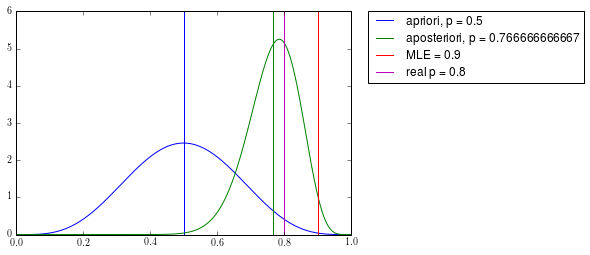

In [25]:
draw_estimator(Apriori(5,5), lucky, 0.8)

Даже с учётом того, что эксперт не угадал истинное значение параметра, байесовская оценка оказалась лучше, чем оценка ММП. Почему?

1. Мнение эксперта взято с не очень большим весом и оценка смогла «обучиться на выборке».
2. Эксперт угадал, в какую сторону балансировать выборку.

На другой выборке оценка ММП может оказаться лучше байесовской.

эксперт думал, что монета скорее честная, и был прав
---

Построим оценку по выборке $fair$ ($p = 0.5$), взяв априорное распределение $Be(5, 5)$. Это соответствует ситуации «эксперт думал, что монета скорее честная, и был прав». Сравним её с оценкой методом максимального правдоподобия. 

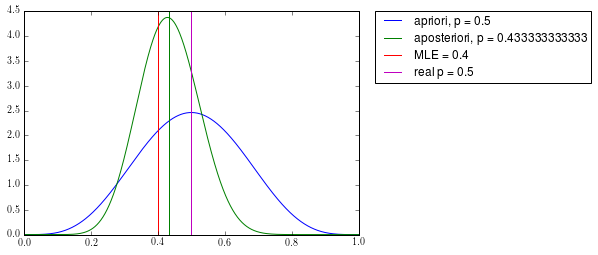

In [6]:
draw_estimator(Apriori(5,5), fair, 0.5)

В этой ситуации эксперт был прав, поэтому на данной выборке оценка байесовским методом лучше оценки методом максимального правдоподобия. Однако значение всё равно «съехало». Почему?

1. Мнение эксперта взято с не очень большим весом, и оценка съехала на несбалансированной выборке.
2. Несбалансированность — нормальное явление для выборок небольшого размера.

Заметим, что байесовская оценка с хорошим априорным распределением не так сильно «скачет» на маленьких выборках, как оценка ММП.

эксперт настаивал, что монета честна
----

Построим оценку по выборке $lucky$ ($p = 0.8$), взяв априорное распределение $Be(250, 250)$. Это соответствует ситуации «эксперт настаивал, что монета честна».

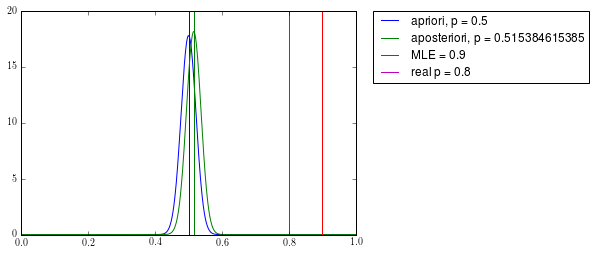

In [7]:
draw_estimator(Apriori(250,250), lucky, 0.8)

Видим, что байесовская оценка с априорным распределением $Be(250, 250)$ для выборки $lucky$ гораздо хуже оценки ММП. Это потому что неправильное мнение эксперта сейчас берётся с огромным весом.

Графики отклонений
======

Построим графики отклонений оценок от истинного значения параметра.

In [37]:
def plot_deviations(estimator_params, sample, p, take_abs=True):
    plt.title(("abs " if take_abs else "") + "deviations from p = " + str(p))
    for params in estimator_params:
        deviations = []
        for i in range(1, 21):
            val = (sample[0:i].sum() + params.a) / (i + params.a + params.b);
            deviations.append(abs(val - p) if take_abs else val - p)
        plt.plot(np.linspace(1, 21, 20), deviations, label=params.label)
    plt.xlim(1, 20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
estimator_params = apriori + [Apriori(0, 0, "MLE")] #используем замечание 1

выборка $lucky$ ($p = 0.8$)
---

Строим график отклонений для выборки $lucky$ ($p = 0.8$).

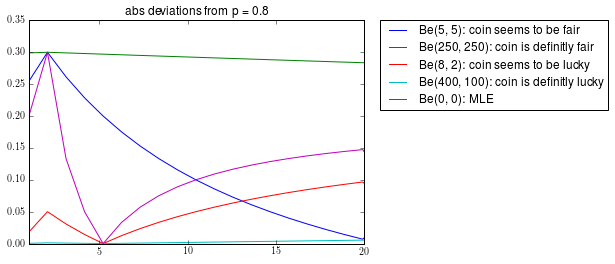

In [38]:
plot_deviations(estimator_params, lucky, 0.8)

Видим, что

1. Наименьшее отклонение у оценки, где эксперт правильно угадал, и у его мнения большой вес (априорное распредение — $Be(400,100)$)
2. Оценка с правильно угаданным параметром, но с меньшим весом мнения эксперта (априорное распредение — $Be(8,2)$) лучше, чем оценка ММП.
3. Оценка с очень весомым неправильным мнением эксперта ($Be(250,250)$) ожидаемо худшая.
4. Байесовская оценка с неправильно угаданным параметром и небольшим весом мнения эксперта ($Be(5,5)$) обогнала байесовскую оценку с правильно угаданным параметром.

Почему мы наблюдаем пункт 4? Потому что смещёние из-за мнение эксперта нивелировало смещение из-за особенностей выборки. Убедимся в правильности предположения, посмотрев на график разности (просто разности, не модуля) между истинным значением параметра и его оценкой.

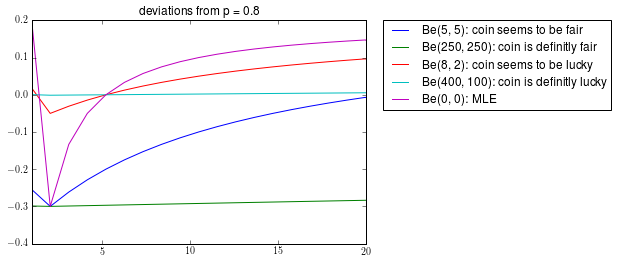

In [39]:
plot_deviations(estimator_params, lucky, 0.8, False)

выборка $fair$ ($p = 0.5$)
---

Строим график отклонений для выборки $fair$ ($p = 0.5$).

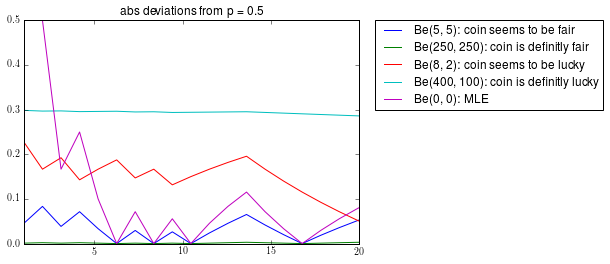

In [40]:
plot_deviations(estimator_params, fair, 0.5)

Результат аналогичен предыдущему случаю. Как и в предыдущем случае, посмотрим ещё и на график разности.

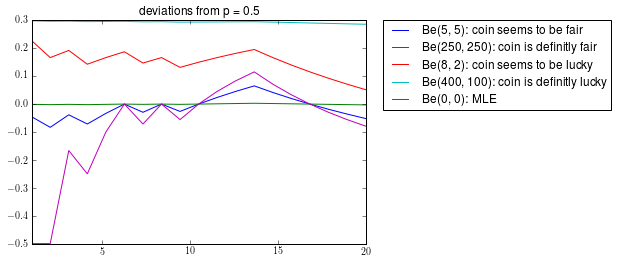

In [41]:
plot_deviations(estimator_params, fair, 0.5, False)

Глядя на график, хочется помахать руками:

+ графики для байесовских оценок имеют форму, схожую с графиком для оценки ММП, только меньше «скачут»
+ график оценки ММП пляшет вокруг истинного значения параметра, а байесовские оценки — от экспертного мнения.

выборка $unlucky$ ($p = 0.2$)
---

Строим график отклонений для выборки $unlucky$ ($p = 0.2$).

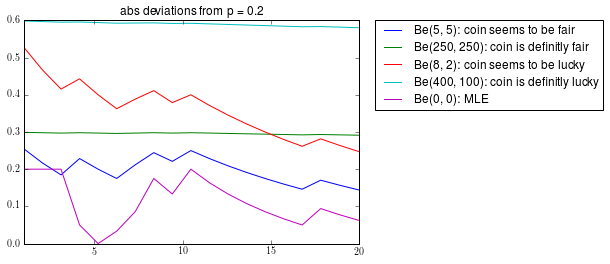

In [42]:
plot_deviations(estimator_params, unlucky, 0.2)

На этом графике байесовские оценки проигрывают оценке ММП, потому что параметр угадан совсем неправильно. Оценки, где неправильное мнение эксперта взято с большим весом, ожидаемо хуже оценок, где у мнения эксперта небольшой вес. Среди оценок, у которых вес мнения эксперта одинаков, ожидаемо лучше та оценка, где предположение эксперта ближе к правде.

**Вывод.** Байесовские оценки с разумно выбранным априорным распределением гораздо лучше оценки ММП на маленьких выборках. Наличие априорного распределения сглаживает скачки оценки, которые неизбежны для ММП, когда данных мало. Можно сказать, что наличие априорного распределения — это защита от переобучения. Однако не стоит увлекаться и давать априорной оценке слишком уж большой вес.